In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('../Dataset/prostate.csv')
df.head(10)

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0
5,-1.049822,3.228826,50,-1.386294,-1.386294,6,0,0.765468,0
6,0.737164,3.473518,64,0.615186,-1.386294,6,0,0.765468,0
7,0.693147,3.539509,58,1.536867,-1.386294,6,0,0.854415,0
8,-0.776529,3.539509,47,-1.386294,-1.386294,6,0,1.047319,0
9,0.223144,3.244544,63,-1.386294,-1.386294,6,0,1.047319,0


In [41]:
df.isnull().values.any()

False

In [42]:
from sklearn.model_selection import train_test_split

x = df.drop('Target', axis=1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=100)

In [43]:
x_train.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
20,1.147402,3.419365,59,-1.386294,-1.386294,6,0,1.638997
23,1.781709,3.451574,63,0.438255,1.178655,7,60,1.713798
6,0.737164,3.473518,64,0.615186,-1.386294,6,0,0.765468
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519
40,0.620576,3.141995,60,-1.386294,-1.386294,9,80,2.297573


In [44]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [45]:
y_pred = model.predict(x_test)

In [46]:
from sklearn import metrics
print('Model Precision :', np.around(metrics.accuracy_score(y_test , y_pred) * 100 , 2),'%')

Model Precision : 75.0 %


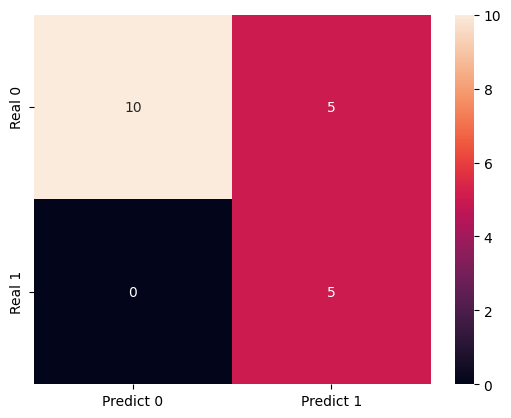

In [47]:
confusion = metrics.confusion_matrix(y_test , y_pred )
confusion_df = pd.DataFrame(confusion , index=['Real 0' , 'Real 1'] , columns=['Predict 0' , 'Predict 1'])
sns.heatmap(confusion_df , annot = True)
plt.show()

In [48]:
evaluation = metrics.classification_report(y_test , y_pred)
print(evaluation)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.50      1.00      0.67         5

    accuracy                           0.75        20
   macro avg       0.75      0.83      0.73        20
weighted avg       0.88      0.75      0.77        20

